# REAL1-CG.3135: Real Estate Data Science

## Class 2: The Algorithm (Representation, Evaluation and Optimization)

## Representation

* $y = m \cdot x + b$: **a line**



* $y = f(\text{observed features})$: **a function** that may be linear or non-linear



* $y_i=\beta_0 + \beta_1 \cdot x_i + \epsilon_i$: **Bivariate linear regression**



* $E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f) + \epsilon_i$: **Capital Asset Pricing Model** from finance

## Evaluation

* It depends on the use case.
    * The impact of increasing interest rates on cap rates: hypothesis testing using either classical or Bayesian inference.
    * Prediction: what is the likelihood (or probability) that AAPL is going up tomorrow?
    * Time-series forecast: mean-squared forecast error on an interest rate forecast.

## Optimization

* Many machine-learning algorithms optimize an objective function.  
    * For example, least squares minimizes its objective function while the logit classifier maximizes its objective function.  
    * Objective functions may have **nice properties** that make optimization easy, but problems may arise when properties are not global.  (And we lack closed-form proofs of global optima.)  



* Let's examine a couple of optimization problems so that you have an idea of what's going on.

Canonical set up:

$f: \Re^{N} \rightarrow \Re$

The goal is to find those points $x \in \Re^{N}$ at which $f(x)$ takes on a critical value.  We can express this as unconstrained optimization problem:

$\max_{x} f(x)$

The necessary first order conditions (FOCs) are:

${\displaystyle \frac{\partial f(x)}{\partial x_i} = 0} \forall i$ 

The sufficient secord order conditions (SOCs) are:

${\displaystyle \frac{\partial^2 f(x)}{\partial x_i\partial x_j}}$
is $\left\{ \begin{array}{l l} 
{} & \quad \text{Negative definite if a maximum} \\ 
{} & \quad \text{Postive definite if a miminum} \\
{} & \quad \text{Indeterminate if neither} \\
\end{array} \right.$

### Example 1

$f(x_1,x_2)=-2x_1^2-x_2^2 + x_1 + x_2$

#### Notes

* The Jupyter environment is the modern PPT and is used for ease of exposition.  
* matplotlib is a general Python graphing libary, similar to R's ggplot2.
* seaborn is "... a library for making statistical graphics in Python." 
* "It is built on top of matplotlib and closely integrated with pandas data structures."
* Minimize is a function called from SciPy, a scientific computing library in Python. 
* We will create arrays to mirror the real line, using linspace.
* We will then graph using two different approaches, the wire mesh and the heat map.

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = -2 * x1**2 - x2**2 + x1 + x2

Text(0.5, 0, '$f(x_1, x_2)$')

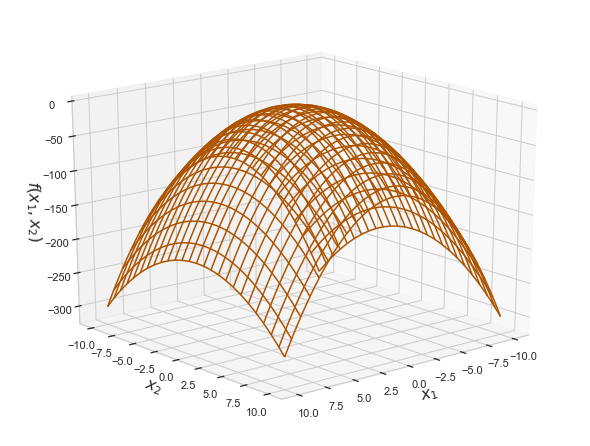

In [3]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

Text(0.5, 0, '$f(x_1, x_2)$')

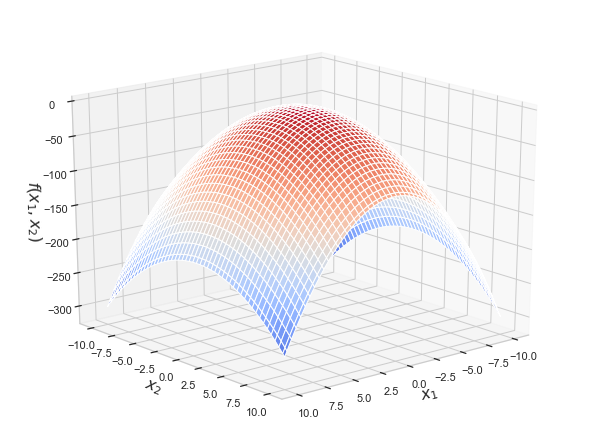

In [4]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

#### Notes
* This is a typical method of Python programming.
* We define a function, func, to which we pass objects.
* We tell it to return manipulations of those objects.

In [5]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(-2 * x1**2 - x2**2 + x1 + x2)

minimize(func, [-10.0, -10.0], args=(-1.0,), method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: -0.375000
         Iterations: 8
         Function evaluations: 40
         Gradient evaluations: 10


      fun: -0.37499999999999917
 hess_inv: array([[0.25132329, 0.00137504],
       [0.00137504, 0.50142814]])
      jac: array([9.31322575e-08, 4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([0.25000002, 0.50000002])

### Example 2

$f(x_1,x_2)= - \sqrt{x_1^2+x_2^2}$

In [6]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = -1.0 * sqrt(x1**2 + x2**2)

Text(0.5, 0, '$f(x_1, x_2)$')

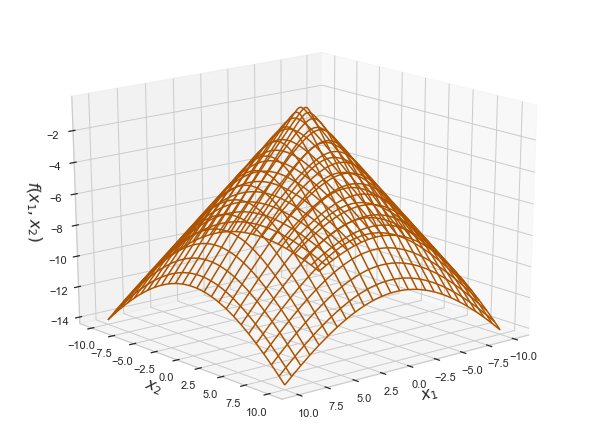

In [7]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

Text(0.5, 0, '$f(x_1, x_2)$')

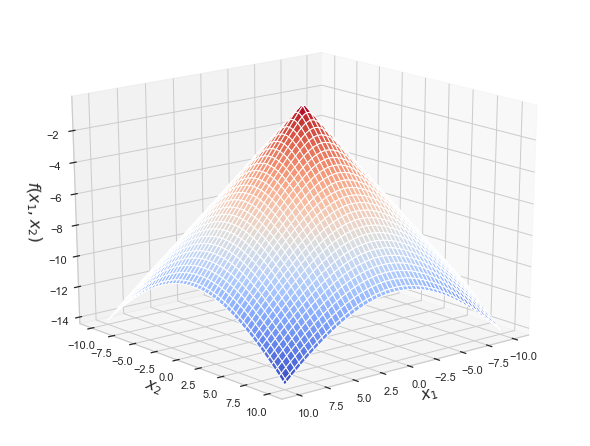

In [8]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20,50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [9]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(sqrt(x1**2 + x2**2))

minimize(func, [-10.0, 10.0], args=(1.0,), method='BFGS', options={'disp': True})

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 580
         Gradient evaluations: 142


      fun: 4.7771336629045634e-09
 hess_inv: array([[1.02649054e-08, 4.51063218e-10],
       [4.51063218e-10, 1.70570891e-08]])
      jac: array([0.36665749, 0.78370151])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 11
     njev: 142
   status: 2
  success: False
        x: array([-4.69736970e-09,  8.69323835e-10])

### Example 3

$f(x_1,x_2)=x_2^2-x_1^2$

In [10]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = x2**2 - x1**2

Text(0.5, 0, '$f(x_1, x_2)$')

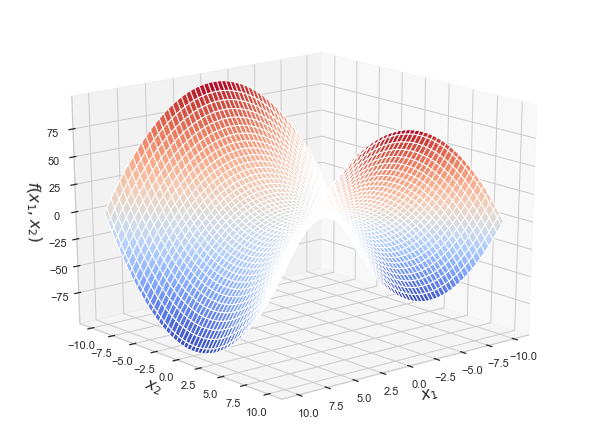

In [11]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [12]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(sqrt(x1**2 + x2**2))

minimize(func, [-10.0, 10.0], args=(1.0,), method='BFGS', options={'disp': True})

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 580
         Gradient evaluations: 142


      fun: 4.7771336629045634e-09
 hess_inv: array([[1.02649054e-08, 4.51063218e-10],
       [4.51063218e-10, 1.70570891e-08]])
      jac: array([0.36665749, 0.78370151])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 11
     njev: 142
   status: 2
  success: False
        x: array([-4.69736970e-09,  8.69323835e-10])

## Foundational Concepts in Probability and Statistics

### Purpose
* Introduce you to important concepts that allow us to operationalize ideas such as Data Generating Processes (or DGPs).
    * **All of this can be done using material you have already seen in RE Finance, RE Capital Markets or RPM.**
    * Ideally these concepts will help you understand that, **at the end of the day**, all we have is data.



* Painful but **necessary**.
    * We should pay respect for the 300 years of history that has brought us here.



* **These ideas should complement your understanding of real estate finance.**



### Geltner Ex 9-1: Probability Distribution Functions
* I am an economist, and I have never seen a demand curve. (I have deployed the tools we will cover in this class to estimate their shape, as measured by a demand elasticity.)



* Distribution functions are mathematical abstractions (like demand curves).



* They help us think about important concepts in probability and measures, such as moments.



* Probability Distribution Functions display the probabilities for all ranges (called a support).



### Geltner Ex 9-2: Expected Returns (Averages) and Risk (Variance or Standard Deviation)
* Historically called measures of central tendancy or "moments".
    * Another mathematical abstraction is the *moment generating function*.



* An average is a first moment.



* A variance is a second moment.



### What is probability?  
* Classical view arose from gambling with dice and holds that outcomes have equal probabilty and events are independent.  




* Subjective view uses a model with randomness such as the payoff to a particular gamble.  Risk aversion is essentially an expression of the subjective view of probability.



* Classical view holds that probability is based on the history of outcomes from an experiment, such as the probability the stock market goes up tomorrow or P(stock market goes up tomorrow).

## Components of an Experiment

#### Sample space, $S$, which is the set of all possible outcomes.

Examples: 

1. Flipping a US penny, $S=\{Heads,Tails\}$

2. Throwing a die, $S=\{1,2,3,4,5,6\}$

3. Throwing two dice, $S=\{i,j\}: i,j=1,2,3,4,5,6$

#### Events, $A$, which are any subset of $S$

Examples: 

1. $Heads \text{ from } \{Heads,Tails\}$

2. $2 \text{ from } \{1,2,3,4,5,6\}$

#### Probability 

$P: A\rightarrow[0,1]$ or $P(A)$

### Axiomatic Properites of Probability

1. The probability of an event occuring lies between 0 and 1: $P(A)\in[0,1]$

2. The probability of the sample space occurring is 1: $P(S)=1$

3. Summation: $P(A \bigcup B) = P(A) + P(B)$ for independent events

4. Conditioning: $P(A|B) = P(A)$ for independent events

5. Complimentary: $P(A^c) = 1-P(A)$

### Random Variables

We operationalize all of this through the use of **Random Variables** (both discrete and continuous) and examine important characteristics of these animals (moments) such as 

* Probability density functions
* Cumulative density functions
* Measures of Central Tendency 
    * Mean 
    * Variance (standard error)
    * Covariance or correlation (when we have more than one RV)
* **These are simply methods of accounting**

### Mathematics of Central Tendency

*All data analtyics drives toward the summarization of information that we call data*.  On occasion, we call this **dimensionality reduction**.

Let $X$ denote a **Random Variable** and $x$ denote an event.  We seek to summarize important components through **dimensionality reduction**.

Population Average:

$\mu=E[X]=\sum P(X=x) \cdot x$

Population Variance:

$\sigma^2=Var[X]=E[(X-E[X])^2]=\sum_k P(X=x) \cdot (x-\mu)^2$

Population Standard Deviation:

$\sigma=\sqrt{\sigma^2}$

Coefficient of Variation: Variation for a given average unit

$c_v=\frac{\sigma}{\mu}$

Sharpe Ratio: Return for a given unit of risk

$S_r=\frac{\mu}{\sigma}$

Let $Y$ denote a different **Random Variable** and $y$ denote an event.

$Cov(X, Y) = E\big[(X-\mu_x)\cdot(Y-\mu_y)\big]$

$Corr(X, Y) = \frac{Cov(X, Y)}{\sigma_x \cdot \sigma_y} \in (-1, 1)$

### Examples of Discrete RVs
Experiment 1 is to toss a coin 10 times.  The random variable is the outcome from each flip, $\{Heads, Tails\}$.  Let's examine using R.

Experiment 2 is to generate two series to examine summary statistics.

### Example of Continuous RVs
* Logistic Distribution.
* Nature's Disribution: The Normal Distribution.

#### Logistic

Cumulative Density Function

$F(x)=\displaystyle{\frac{1}{1+\exp(-x)}}$

Probability Density Function

$f(x)=F^\prime(x)=\displaystyle{\frac{\exp(-x)}{1+\exp(-x)}}$

In [13]:
x = np.linspace(-10, 10, 1000)
pdf = np.exp(-x)/(1+np.exp(-x))**2
cdf = 1/(1+np.exp(-x))

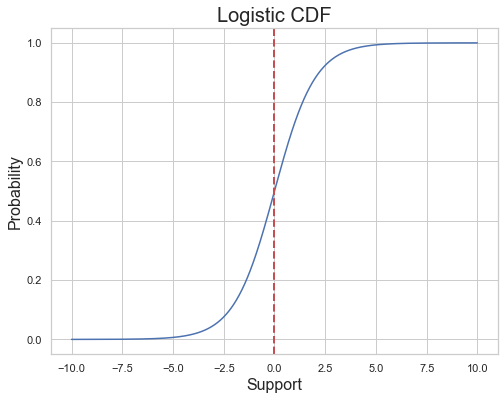

In [14]:
plt.figure(figsize = (8, 6))
plt.plot(x, cdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.title('Logistic CDF', fontsize = 20)
plt.axvline(0, color='r', ls='--', lw=2.0)

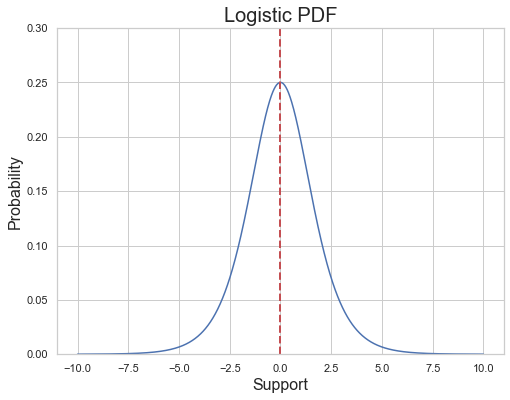

In [15]:
plt.figure(figsize = (8, 6))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.3))
plt.title('Logistic PDF', fontsize = 20)
plt.axvline(0, color='r', ls='--', lw=2.0)

#### Univariate Standard Normal (or Gaussian), denoted $N(0,1)$

Probability Density Function

$f(x)=\displaystyle{\frac{1}{\sqrt{2\pi}}}\exp\{-\frac{1}{2}x^2\}$

For $N(\mu,\sigma^2)$ formula is:

$f(x)=\displaystyle{\frac{1}{\sqrt{2\pi\sigma^2}}}\exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}$

In [16]:
x = np.linspace(-10, 10, 1000)
pdf = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

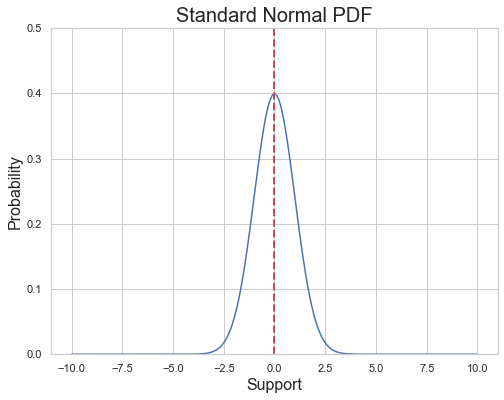

In [17]:
plt.figure(figsize = (8, 6))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title('Standard Normal PDF', fontsize = 20)
plt.axvline(0, color='r', ls='--', lw=2.0)

### Measures of Central Tendency (Mean and Variances): R Example



### Returns of a Single Asset: The Normal Distribution



### Returns of Two Correlated Assets: The Bivariate Normal Distribution



### Introduction to Hypothesis Testing: Why We Test Against the Normal
* Algorithms and hypothesis testing are conceptual different things.
    * Develop an algorithm that has no underlying hypothesis to test: Deep Learning.
    * Develop a hypothesis without an underlying algorithm to examine: Thought Leadership.



* One important reason we conduct data analysis is to examine our conjectures about how the world or some system operates. 



* This may be done explicitly using hypothesis testing or done implicitly when we develop of a statistical model for estimation and prediction. 
    * Implicit in the prediction model is a hypothesis about the stability of relationships through time or through space.



* There is a formalized way to conduct hypothesis testing: a data scientist lays out a conjecture about a system in a formal manner. 
    * Mutually exclusive and contradictory statement about the value of some parameter from a statistical model that characterizes the conjecture.
    * A hypothesis is a claim either about the value of a single population characteristic or about the values of several population characteristics.

In [18]:
x = np.linspace(-3, 3, 1000)
pdf = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

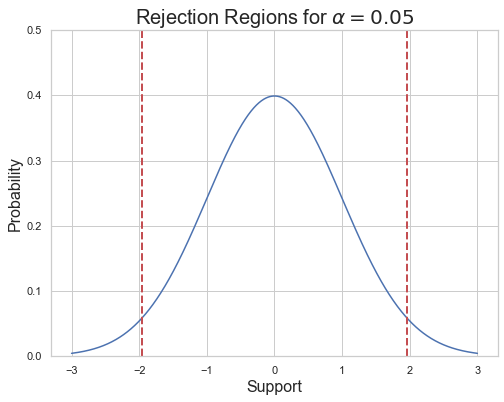

In [19]:
plt.figure(figsize = (8, 6))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title(r'Rejection Regions for $\alpha=0.05$', fontsize = 20)
plt.axvline(-1.96, color='r', ls='--', lw=2.0)
plt.axvline(1.96, color='r', ls='--', lw=2.0)